In [29]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [30]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# MNist fashion
loading Mnist data from tf.keras dataset API

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.17):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [32]:
mnist = tf.keras.datasets.fashion_mnist

In [33]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

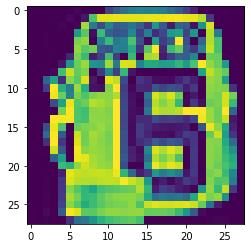

In [34]:
import numpy as np

import matplotlib.pyplot as plt
plt.imshow(training_images[6000])


In [35]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [36]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [39]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=7,callbacks=[callbacks])
model.evaluate(training_images, training_labels)

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2578 - accuracy: 0.9032
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2479 - accuracy: 0.9064
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2373 - accuracy: 0.9115
Epoch 4/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2304 - accuracy: 0.9142
Epoch 5/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2238 - accuracy: 0.9157
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2175 - accuracy: 0.9186
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2000 - accuracy: 0.9234


[0.20002910494804382, 0.9234166741371155]

In [38]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3504 - accuracy: 0.8751


[0.3504238426685333, 0.8751000165939331]